# Candlestick Evening Doji Star

https://www.tradingview.com/support/solutions/43000592705-evening-doji-star-bearish/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-01-01'
end = '2021-10-11'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.248272,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.241096,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.432652,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.904385,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.748737,82271200


## Candlestick with Evening Doji Star

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,736696.0,42.540001,43.075001,42.314999,43.064999,41.248272,102223600,False
1,736697.0,43.132500,43.637501,42.990002,43.057499,41.241096,118071600,False
2,736698.0,43.134998,43.367500,43.020000,43.257500,41.432652,89738400,False
3,736699.0,43.360001,43.842499,43.262501,43.750000,41.904385,94640000,False
4,736702.0,43.587502,43.902500,43.482498,43.587502,41.748737,82271200,False


Text(0, 0.5, 'Price')

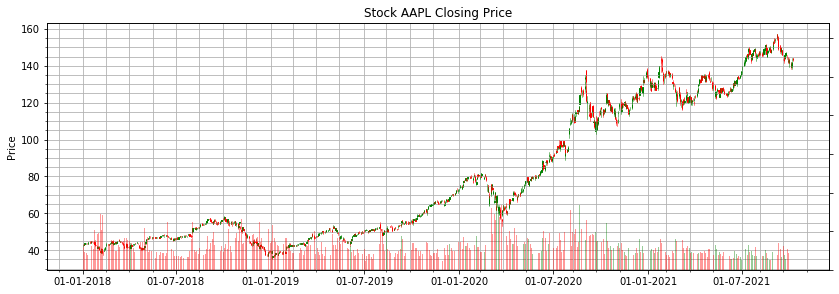

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
evening_doji_star = talib.CDLEVENINGDOJISTAR(df['Open'], df['High'], df['Low'], df['Close'])

evening_doji_star = evening_doji_star[evening_doji_star != 0]

In [6]:
df['evening_doji_star'] = talib.CDLEVENINGDOJISTAR(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['evening_doji_star'] !=0]

,Open,High,Low,Close,Adj Close,Volume,evening_doji_star
Date,,,,,,,
2018-04-06,42.742500,43.119999,42.049999,42.095001,40.483585,140021200,-100
2020-12-09,124.529999,125.949997,121.000000,121.779999,121.210495,115089200,-100


In [8]:
df['Adj Close'].loc[df['evening_doji_star'] !=0]

Date
2018-04-06     40.483585
2020-12-09    121.210495
Name: Adj Close, dtype: float64

In [9]:
df['Adj Close'].loc[df['evening_doji_star'] !=0].index

DatetimeIndex(['2018-04-06', '2020-12-09'], dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
evening_doji_star

Date
2018-04-06   -100
2020-12-09   -100
dtype: int32

In [11]:
evening_doji_star.index

DatetimeIndex(['2018-04-06', '2020-12-09'], dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,evening_doji_star
Date,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.248272,102223600,0
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.241096,118071600,0
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.432652,89738400,0
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.904385,94640000,0
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.748737,82271200,0
...,...,...,...,...,...,...,...
2021-10-04,141.759995,142.210007,138.270004,139.139999,139.139999,98322000,0
2021-10-05,139.490005,142.240005,139.360001,141.110001,141.110001,80861100,0
2021-10-06,139.470001,142.149994,138.369995,142.000000,142.000000,83221100,0


Text(0, 0.5, 'Price')

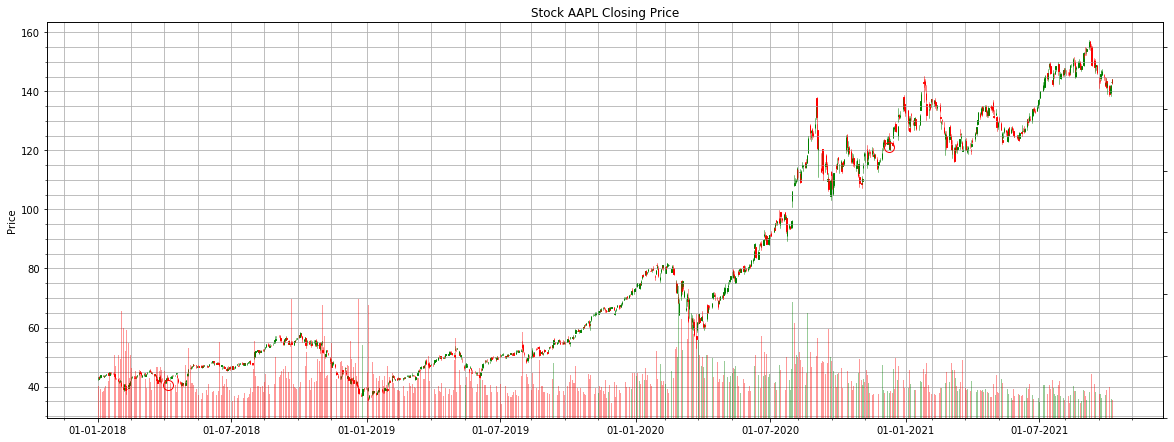

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['evening_doji_star'] !=0].index, df['Adj Close'].loc[df['evening_doji_star'] !=0],
                'or', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2020-12-01':'2021-01-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,evening_doji_star,VolumePositive
0,737760.0,121.010002,123.470001,120.010002,122.720001,122.146103,127728200,0,True
1,737761.0,122.019997,123.370003,120.889999,123.080002,122.504417,89004200,0,True
2,737762.0,123.519997,123.779999,122.209999,122.940002,122.365074,78967600,0,False
3,737763.0,122.599998,122.860001,121.519997,122.250000,121.678307,78260400,0,False
4,737766.0,122.309998,124.570000,122.250000,123.750000,123.171288,86712000,0,True


Text(0, 0.5, 'Price')

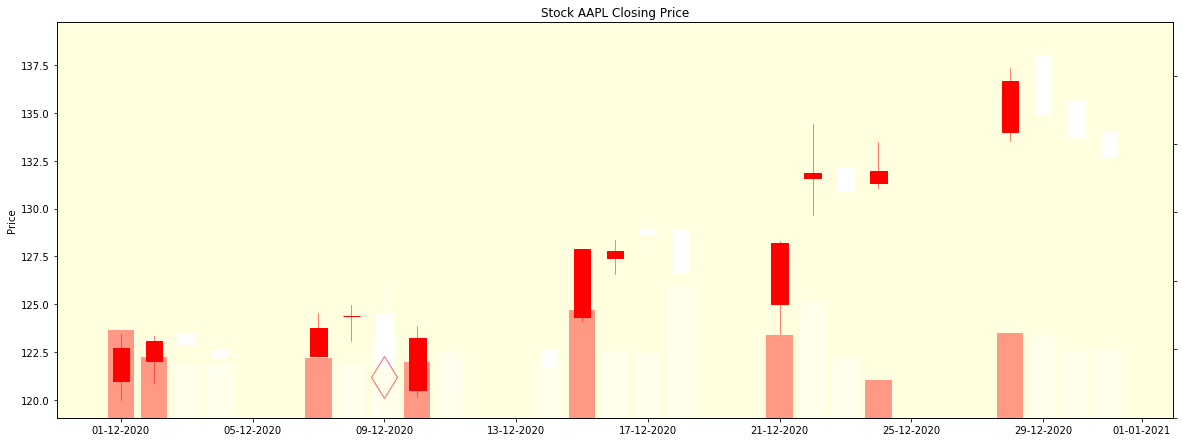

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('lightyellow')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='r', colordown='w', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['evening_doji_star'] !=0].index, df['Adj Close'].loc[df['evening_doji_star'] !=0],
                'dr', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=30.0) 
colors = dfc.VolumePositive.map({True: 'r', False: 'w'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

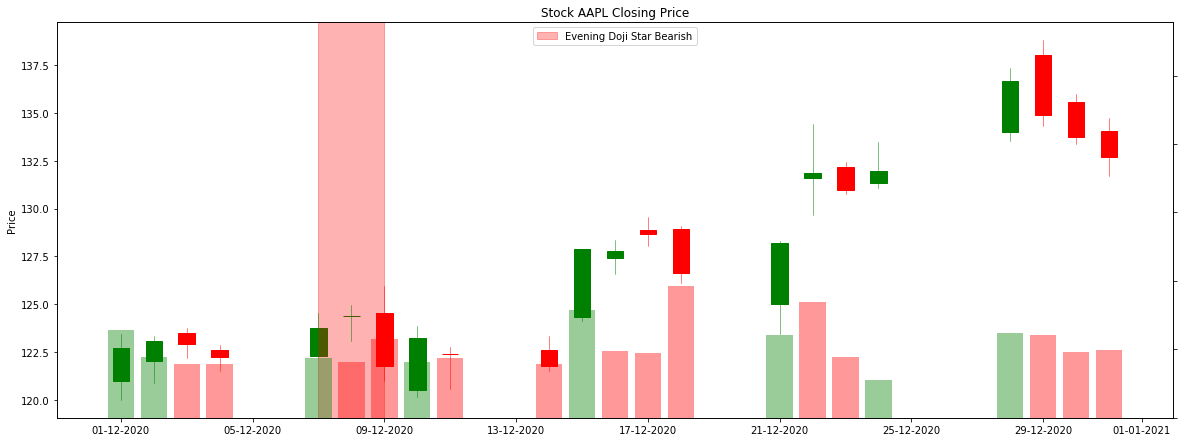

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2020,12,7)), date2num(datetime(2020,12,9)), 
           label="Evening Doji Star Bearish",color="red", alpha=0.3)
ax.legend(loc='upper center')
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')